# S&P

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\harsh\Downloads\S&P 5002 - Sheet1.csv")

In [3]:
data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,14/11/2019,3097,3090.75,3098.20,3083.26,0,0.08%
1,13/11/2019,3094,3084.18,3098.06,3078.80,0,0.07%
2,12/11/2019,3092,3089.28,3102.61,3084.73,0,0.16%
3,11/11/2019,3087,3080.33,3088.33,3075.82,0,-0.20%
4,08/11/2019,3093,3081.25,3093.09,3073.58,0,0.26%


In [4]:
data.Date = pd.to_datetime(data.Date, dayfirst = True)

In [5]:
data.set_index("Date" , inplace = True)

In [6]:
data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2019-11-14,3097,3090.75,3098.20,3083.26,0,0.08%
2019-11-13,3094,3084.18,3098.06,3078.80,0,0.07%
2019-11-12,3092,3089.28,3102.61,3084.73,0,0.16%
2019-11-11,3087,3080.33,3088.33,3075.82,0,-0.20%
2019-11-08,3093,3081.25,3093.09,3073.58,0,0.26%


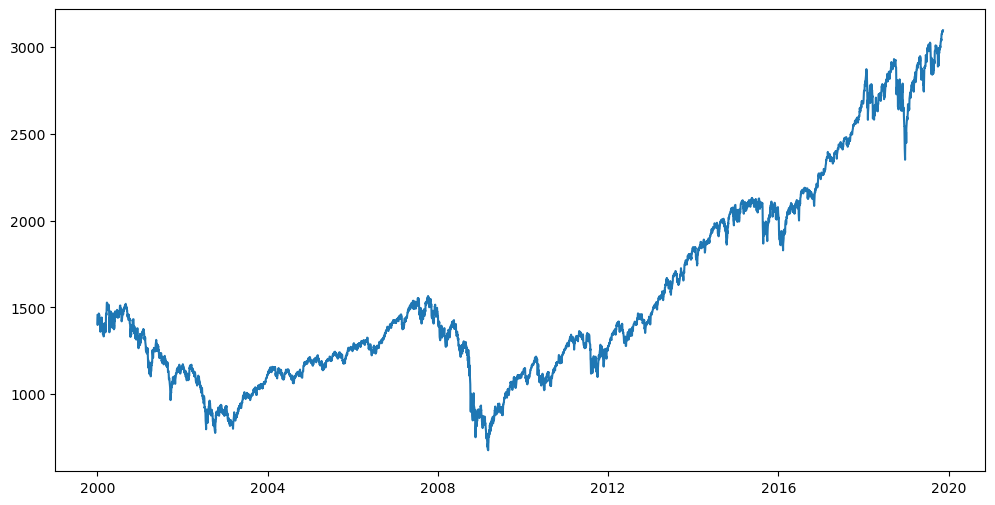

In [7]:
plt.figure(figsize = (12,6))
plt.plot(data.Price)

In [8]:
data1 = data.reset_index()

In [9]:
data1.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2019-11-14,3097,3090.75,3098.20,3083.26,0,0.08%
1,2019-11-13,3094,3084.18,3098.06,3078.80,0,0.07%
2,2019-11-12,3092,3089.28,3102.61,3084.73,0,0.16%
3,2019-11-11,3087,3080.33,3088.33,3075.82,0,-0.20%
4,2019-11-08,3093,3081.25,3093.09,3073.58,0,0.26%


In [10]:
data1.drop(['Date','Volume','Chg%'],axis = 1)

,Price,Open,High,Low
0,3097,3090.75,3098.20,3083.26
1,3094,3084.18,3098.06,3078.80
2,3092,3089.28,3102.61,3084.73
3,3087,3080.33,3088.33,3075.82
4,3093,3081.25,3093.09,3073.58
...,...,...,...,...
4995,1442,1403.50,1441.50,1400.50
4996,1404,1402.10,1411.90,1392.00
4997,1402,1399.40,1413.30,1377.70
4998,1399,1455.20,1455.20,1397.40


In [11]:
df = data1.Price.rolling(100).mean()

In [12]:
df1 = data1.Price.rolling(200).mean()

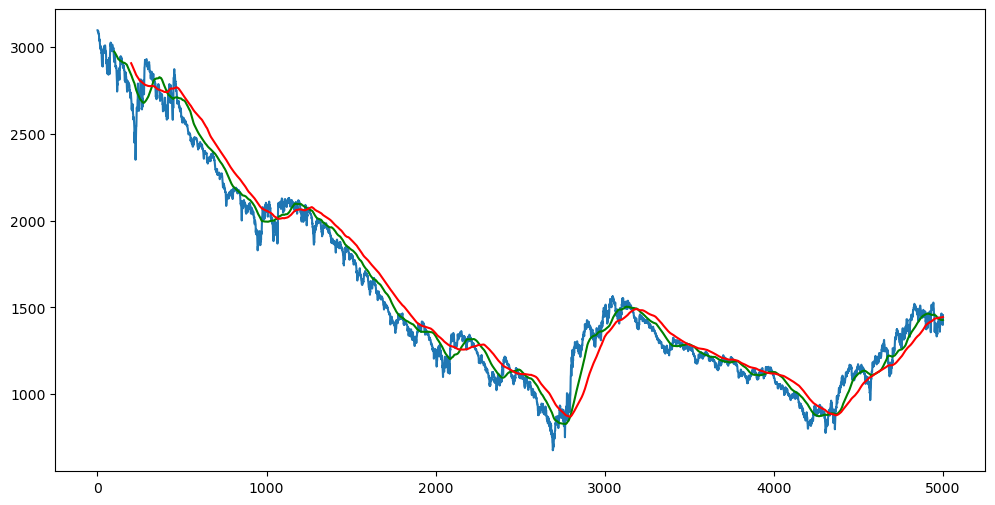

In [13]:
plt.figure(figsize = (12,6))
plt.plot(data1.Price)
plt.plot(df, 'g')
plt.plot(df1, 'r')

In [14]:
data.shape

(5000, 6)

In [15]:
data2 = data.drop(['Open','Volume','High','Low','Chg%'],axis = 1)

In [16]:
data2.head()

,Price
Date,
2019-11-14,3097
2019-11-13,3094
2019-11-12,3092
2019-11-11,3087
2019-11-08,3093


In [17]:
split = int(len(data2)*0.8)

In [18]:
train_data = pd.DataFrame(data2['Price'][0:split])
test_data = pd.DataFrame(data2['Price'][split:])

In [19]:
train_data.shape

(4000, 1)

In [20]:
test_data.shape

(1000, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
train_data_array = scaler.fit_transform(train_data)

In [23]:
train_data_array.shape

(4000, 1)

In [24]:
test_data_array = scaler.fit_transform(test_data)

In [25]:
x_train = []
y_train = []
for i in range(100,train_data_array.shape[0]):
    x_train.append(train_data_array[i-100 : i])
    y_train.append(train_data_array[i , 0])
   

In [26]:
x_train = np.array(x_train)

In [27]:
y_train = np.array(y_train)

In [28]:
from keras.layers.core import Dense
from keras.layers import Dropout, LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu',return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,return_sequences = True, activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,return_sequences = True, activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
122/122 [==============================] - 24s 146ms/step - loss: 0.0207
Epoch 2/10
122/122 [==============================] - 18s 150ms/step - loss: 0.0048
Epoch 3/10
122/122 [==============================] - 19s 154ms/step - loss: 0.0052
Epoch 4/10
122/122 [==============================] - 17s 138ms/step - loss: 0.0045
Epoch 5/10
122/122 [==============================] - 17s 140ms/step - loss: 0.0038
Epoch 6/10
122/122 [==============================] - 17s 139ms/step - loss: 0.0036
Epoch 7/10
122/122 [==============================] - 17s 138ms/step - loss: 0.0033
Epoch 8/10
122/122 [==============================] - 17s 143ms/step - loss: 0.0029
Epoch 9/10
122/122 [==============================] - 17s 140ms/step - loss: 0.0029
Epoch 10/10
122/122 [==============================] - 17s 141ms/step - loss: 0.0027


In [32]:
model.save('keras_modelS&P.h5')

In [33]:
test_data.head()

,Price
Date,
2003-12-24,1094
2003-12-23,1096
2003-12-22,1093
2003-12-19,1089
2003-12-18,1089


In [34]:
past_100_days = train_data.tail(100)

In [35]:
past_100_days.shape

(100, 1)

In [36]:
final_df = past_100_days.append(test_data, ignore_index = True)

In [37]:
final_df.shape

(1100, 1)

In [38]:
final_df.head()

,Price
0,1089
1,1092
2,1084
3,1096
4,1096


In [39]:
input_data = scaler.fit_transform(final_df)

In [40]:
input_data.shape

(1100, 1)

In [41]:
input_data

array([[0.41544607],
       [0.41944075],
       [0.40878828],
       ...,
       [0.8322237 ],
       [0.82822903],
       [0.90279627]])

In [42]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [43]:
x_test, y_test = np.array(x_test),np.array(y_test)

In [44]:
x_test.shape

(1000, 100, 1)

In [45]:
y_test.shape

(1000,)

In [46]:
y_pred = model.predict(x_test)

32/32 [==============================] - 2s 34ms/step


In [47]:
y_pred.shape

(1000, 1)

In [48]:
scaler.scale_

array([0.00133156])

In [49]:
scale_factor = 1/0.00133156

In [50]:
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

Text(0, 0.5, 'Price')

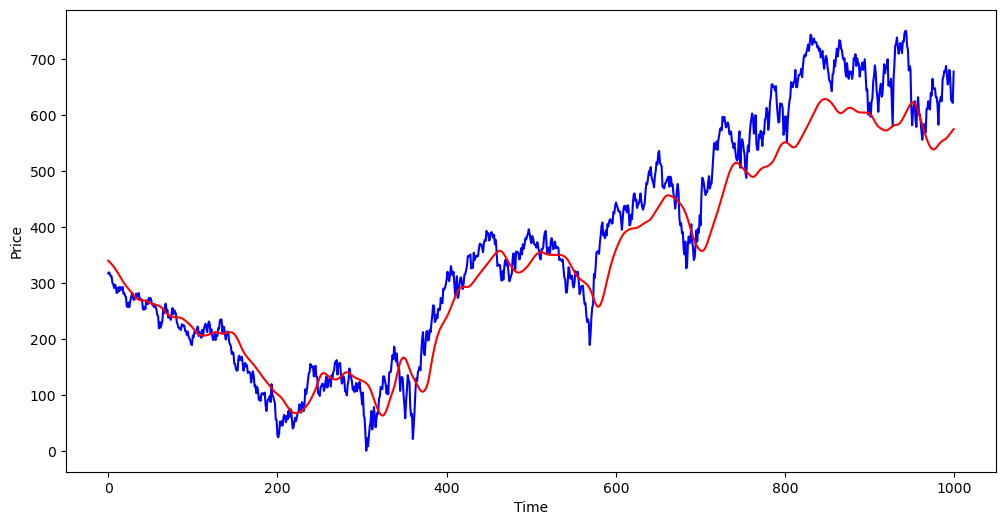

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original')
plt.plot(y_pred, 'r', label = 'Predicted')
plt.xlabel('Time')
plt.ylabel('Price')

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

60.90951021272023
